# Data Wrangling of Fremont Bridge's data set

### Import Fremont Bridge's data into local directory

In [1]:
# import urllib.request as req
# req.urlretrieve('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', 'data/FremontBridge.csv')

### Load Data and  start exploring

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set()

In [4]:
fb = pd.read_csv('../input/bicycle-data/FremontBridge.csv', index_col='Date', parse_dates=True)

In [5]:
print(fb.head(5))
print(fb.tail(5))

                     Fremont Bridge East Sidewalk  \
Date                                                
2012-10-03 00:00:00                           9.0   
2012-10-03 01:00:00                           6.0   
2012-10-03 02:00:00                           1.0   
2012-10-03 03:00:00                           3.0   
2012-10-03 04:00:00                           1.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2012-10-03 00:00:00                           4.0  
2012-10-03 01:00:00                           4.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           2.0  
2012-10-03 04:00:00                           6.0  
                     Fremont Bridge East Sidewalk  \
Date                                                
2018-06-30 19:00:00                          39.0   
2018-06-30 20:00:00                          30.0   
2018-06-30 21:00:00                          21.0   

In [6]:
fb.shape

(50328, 2)

In [7]:
fb.dtypes

Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [8]:
fb.columns = ['East','West']
fb.head(5)

,East,West
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [9]:
# fb['Total'] = fb['East'] + fb['West']
fb['Total'] = fb.eval('East + West')
fb.head(5)

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [10]:
# Check for null values
fb.isna().sum()

East     9
West     9
Total    9
dtype: int64

In [11]:
fb.dropna(inplace=True)
fb.count()

East     50319
West     50319
Total    50319
dtype: int64

In [12]:
fb.describe()

,East,West,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


Text(0, 0.5, 'Hourly Bicycle Count')

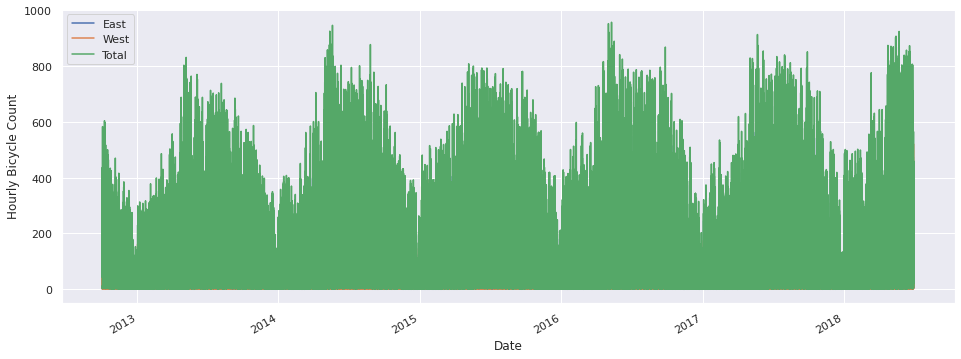

In [13]:
fb.plot(kind='line', figsize=(16,6))
plt.legend(loc='upper left')
plt.ylabel('Hourly Bicycle Count')
# Obsevation: The 30k+ samples are way too dense to make sense, because we hardly see East and West data ata the bottom.

fb_daily size : 6291


Text(0, 0.5, 'Daily Bicycle Count')

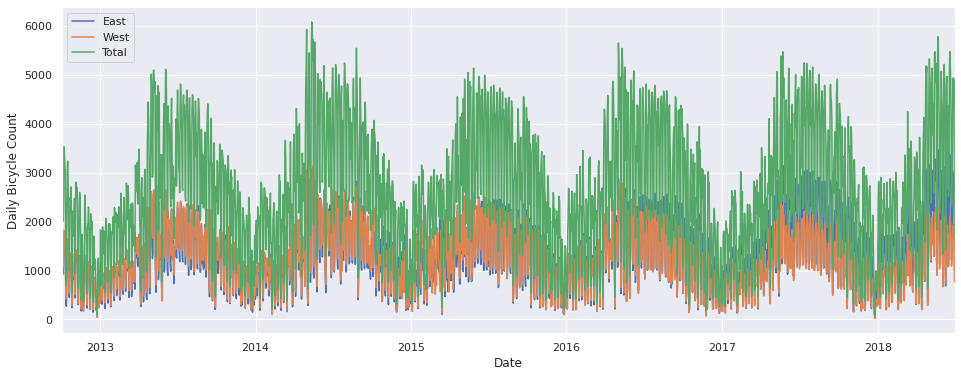

In [14]:
# How about if we resample the data from hourly to daily?
fb_daily = fb.resample('d').sum()
print('fb_daily size :',fb_daily.size)
fb_daily.plot(kind='line', figsize=(16,6))
plt.ylabel('Daily Bicycle Count')
# Observation: It's still dense with daily data.

In [15]:
fb

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0
...,...,...,...
2018-06-30 19:00:00,39.0,31.0,70.0
2018-06-30 20:00:00,30.0,13.0,43.0
2018-06-30 21:00:00,21.0,13.0,34.0


fb_weekly size : 900


Text(0, 0.5, 'Weekly Bicycle Count')

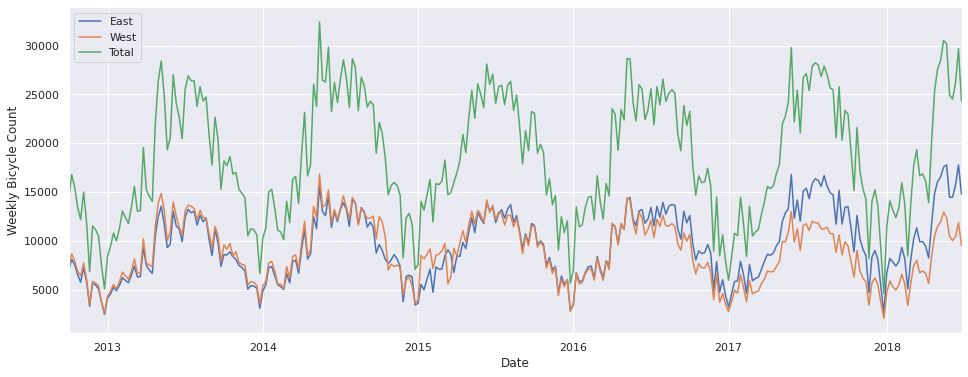

In [16]:
# How about if we resample the data from daily to weekly? 53 weeks a year isn't much dense after  all, right?
fb_weekly = fb_daily.resample('W').sum()
print('fb_weekly size :',fb_weekly.size)
fb_weekly.plot(kind='line', figsize=(16,6))
plt.ylabel('Weekly Bicycle Count')
# Observation: Life is better now..for data analysis
# The frequency line varies widely. What do we infer?
# People bicycle more in summer (see the peaks evevry year in the graph) than in winter
# Even within a season, there are wide-fluctuations than near-consistency in the counts from one week to another. Why?
# Perhaps because of temperature, precipitation and other factors..

In [17]:
fb_weekly


,East,West,Total
Date,,,
2012-10-07,6995.0,7297.0,14292.0
2012-10-14,8116.0,8679.0,16795.0
2012-10-21,7563.0,7946.0,15509.0
2012-10-28,6536.0,6901.0,13437.0
2012-11-04,5786.0,6408.0,12194.0
...,...,...,...
2018-06-03,14462.0,10489.0,24951.0
2018-06-10,14490.0,10037.0,24527.0
2018-06-17,15748.0,10461.0,26209.0


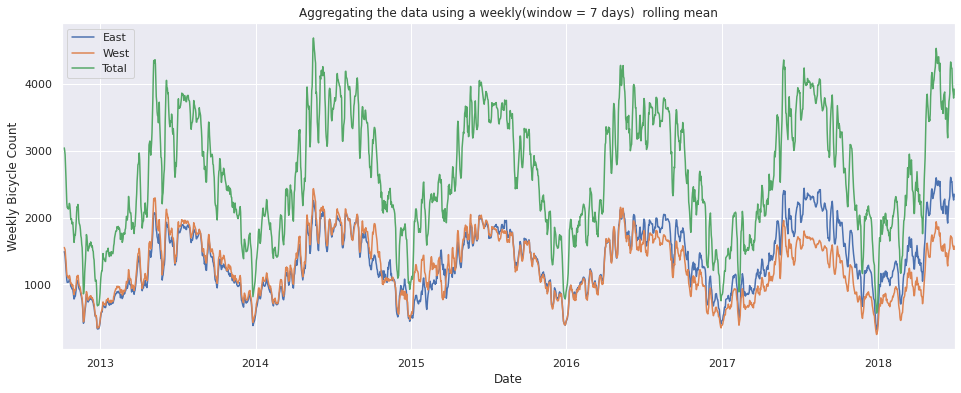

In [18]:
# The same weekly  plot can be pllot from daily dataset like below
fb_daily.rolling(window=7).mean().plot(kind='line', figsize=(16,6))
plt.title('Aggregating the data using a weekly(window = 7 days)  rolling mean')
plt.ylabel('Weekly Bicycle Count')
plt.show()

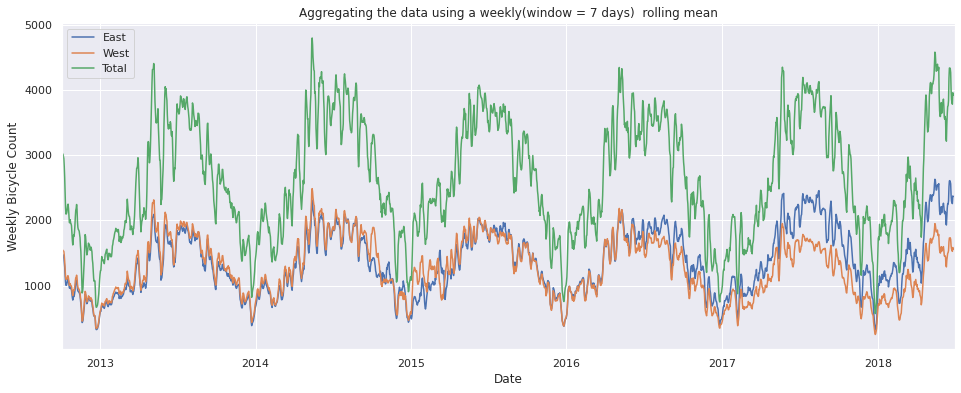

In [19]:
# The jaggedness of the result is due to the hard cutoff of the window. 
# We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.
# The above weekly plot is a little jagged and can be smoothened like below:
# The following code specifies both the width of the window (we chose 7 days) and 
# the width of the Gaussian within the window (we chose 3 days):
fb_daily.rolling(window=7, center=True, win_type='gaussian').mean(std=5).plot(figsize=(16,6))
plt.title('Aggregating the data using a weekly(window = 7 days)  rolling mean')
plt.ylabel('Weekly Bicycle Count')
plt.show()
# Observation: Smoothening isn't really so good in this case, likee how it used to be :-/

Hourly Ticks : [    0  3600  7200 10800 14400 18000 21600 25200 28800 32400 36000 39600
 43200 46800 50400 54000 57600 61200 64800 68400 72000 75600 79200 82800]


(array([    0,  3600,  7200, 10800, 14400, 18000, 21600, 25200, 28800,
        32400, 36000, 39600, 43200, 46800, 50400, 54000, 57600, 61200,
        64800, 68400, 72000, 75600, 79200, 82800]),
 <a list of 24 Text major ticklabel objects>)

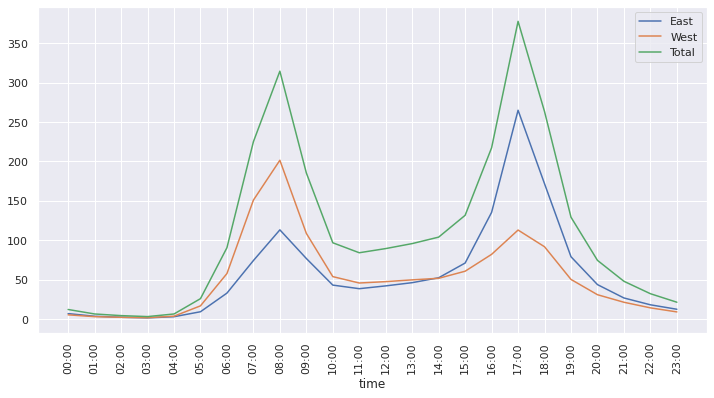

In [20]:
# We might want to look at the average traffic as a function of the time of day.
gby_time = fb.groupby(fb.index.time).mean()
hourly_ticks = 60 * 60 * np.arange(24)
print('Hourly Ticks :', hourly_ticks)
gby_time.plot(xticks=hourly_ticks,figsize=(12,6))
plt.xticks(rotation='vertical')
# Observation: The hourly traffic is a strongly bimodal distribution (do yu see 2 mountains in the graph?), 
# with peaks around 8:00 in the morning and 5:00 in the evening.

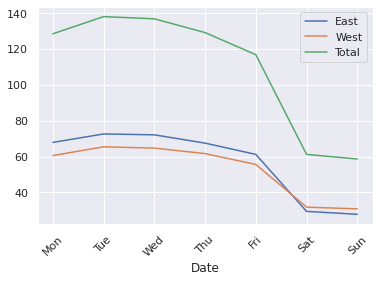

In [21]:
# We also might be curious about how things change based on the day of the week. 
# Again, we can do this with a simple groupby
gby_week = fb.groupby(fb.index.dayofweek).mean()
# print(gby_week)
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
# gby_week.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
gby_week.plot()
plt.xticks(range(len(weekdays)),weekdays, rotation=45)
plt.show()
# Observation: This shows a strong distinction between weekday and weekend totals, 
# with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

In [22]:
weekday_mask = np.where(fb_daily.index.weekday < 5, 'Weekday', 'Weekend') # 5 and 6 are Sat and Sun => Weekend
len(weekday_mask)
weekday_mask

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekend'], dtype='<U7')

In [23]:
# See how the hourly trend looks like between weekdays and weekends
# Now that  means we arer grouping-by weekday-mask and hourly-time
weekday_mask = np.where(fb.index.weekday < 5, 'weekday','weekend')
gby_hourly = fb.groupby([weekday_mask,fb.index.time]).mean()
gby_hourly

East        West       Total
weekday 00:00:00    5.677570    4.524032   10.201602
        01:00:00    2.652203    2.345794    4.997997
        02:00:00    1.658879    1.717623    3.376502
        03:00:00    1.257677    1.463284    2.720961
        04:00:00    3.121495    4.177570    7.299065
        05:00:00   11.488652   21.580774   33.069426
        06:00:00   42.443925   77.341121  119.785047
        07:00:00   97.971963  204.359146  302.331108
        08:00:00  147.653538  269.373832  417.027370
        09:00:00   92.638611  134.694723  227.333333
        10:00:00   42.968604   53.894456   96.863059
        11:00:00   33.100868   39.279225   72.380094
        12:00:00   35.603206   39.314629   74.917836
        13:00:00   39.546061   41.441923   80.987984
        14:00:00   47.839786   43.969960   91.809746
        15:00:00   74.164219   57.078772  131.242991
        16:00:00  166.096128   89.437250  255.533378
        17:00:00  350.750334  136.798398  487.548732
        18:00:00  224.821095  111.507343  336.328438
        19:00:00   99.644192   59.183578  158.827770
        20:00:00   52.670227   35.348465   88.018692
        21:00:00   31.110814   24.193591   55.304406
        22:00:00   20.170895   15.648865   35.819760
        23:00:00   13.096128    9.482644   22.578772
weekend 00:00:00    9.545910    6.944908   16.490818
        01:00:00    5.295492    4.292154    9.587646
        02:00:00    3.324916    3.021886    6.346801
        03:00:00    1.716194    1.926544    3.642738
        04:00:00    2.078464    1.749583    3.828047
        05:00:00    3.245409    4.240401    7.485810
        06:00:00    8.671119    8.328881   17.000000
        07:00:00   14.470785   16.916528   31.387312
        08:00:00   26.624374   31.497496   58.121870
        09:00:00   36.976628   43.454090   80.430718
        10:00:00   42.921536   53.320534   96.242070
        11:00:00   51.676127   61.450751  113.126878
        12:00:00   57.891486   67.459098  125.350584
        13:00:00   62.302170   70.053422  132.355593
        14:00:00   63.383973   70.664441  134.048414
        15:00:00   62.979967   69.353923  132.333890
        16:00:00   58.173623   63.382304  121.555927
        17:00:00   50.275459   52.961603  103.237062
        18:00:00   38.590985   41.908180   80.499165
        19:00:00   27.233723   27.574290   54.808013
        20:00:00   20.891486   19.317195   40.208681
        21:00:00   15.410684   13.632721   29.043406
        22:00:00   12.422371   10.140234   22.562604
        23:00:00   10.305509    7.535893   17.841402

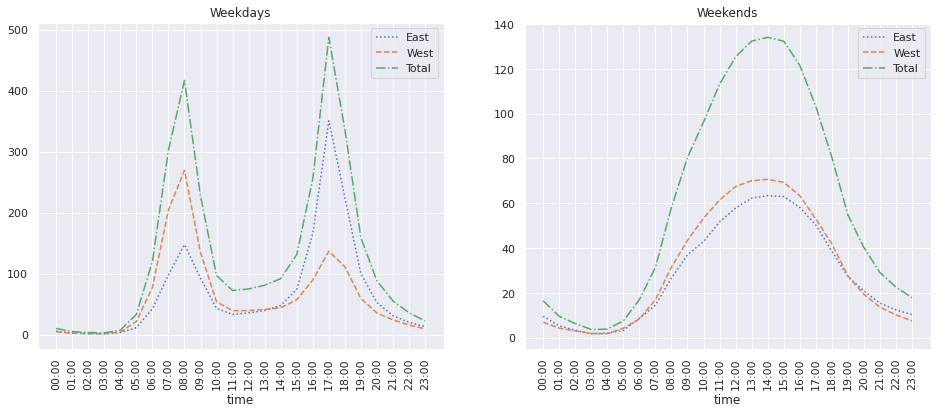

In [24]:
hourly_ticks = 60 * 60 * np.arange(24)
fig, ax = plt.subplots(1,2,figsize=(16,6))
gby_hourly.loc['weekday',:].plot(ax=ax[0], xticks=hourly_ticks, title='Weekdays', style=[':','--','-.'])
gby_hourly.loc['weekend',:].plot(ax=ax[1], xticks=hourly_ticks, title='Weekends', style=[':','--','-.'])


# plt.xticks(rotation=90) only affects the last subplot whose reference is active
# To change the xticks on every sub-plot
for x in ax:
    x.xaxis.set_tick_params(rotation=90)
    
# Observation: We see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
# It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people’s commuting patterns

# Data Wrangling by merging Datasets (Fremont Bridge and Weather Data)

In [25]:
# Load Daily Weather data of Fremont Bridge
wd = pd.read_csv('data/1404899.csv', index_col='DATE', parse_dates=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/1404899.csv'

In [ ]:
wd.shape

In [ ]:
fb_daily.shape # The number of days/rows match in both datasets - fb_daily and wd

In [ ]:
wd.head(5)

In [ ]:
wd.columns

In [ ]:
wd[['STATION','NAME','PRCP','SNOW','TMAX','TMIN']].isnull().sum()

In [ ]:
wd = wd.filter(['STATION','NAME','PRCP','SNOW','TMAX','TMIN'], axis=1)
wd.head(5)

In [ ]:
# How Snowy days are recorded? how do the values look like?
np.sort( wd.SNOW.unique() ) # So the values range between 0 and 5.1

In [ ]:
np.sort( wd.PRCP.unique() ) # So the values range between 0 and 2.2

In [ ]:
wd.loc[ (wd['SNOW'] > 0) & (wd['PRCP'] == 0) ] # No rows available. So, the precipitation (PRCP) cannot be 0, when it Snows (SNOW > 0).

In [ ]:
# df = fb_daily['Total'].copy()
df = fb_daily.filter(['Total'], axis=1)
print('Shape : ',df.shape)
df.head(5)

#### Feature Engineering : Categorical Values
* We saw previously that the patterns of use generally vary from day to day; let’s account for this in our data by adding binary columns that indicate the day of the week.
* Similarly, we might expect riders to behave differently on holidays; let’s add an indicator of this as well.

In [ ]:
print(weekdays)
print(list(range(7)))

In [ ]:
# Feature  Engineering : Categorical Values : adding binary columns that indicate the day of the week
for i in range(7):
    df[weekdays[i]] = (df.index.weekday ==  i).astype(int)
df.head(7)    

In [ ]:
# df.columns['Total'] = df.columns['TotalBikesCount']
df = df.rename(columns={'Total':'TotalBikesCount'})
df.head(5)

In [ ]:
# Assuming, riders to behave differently on holidays.; we add an indicator for this by incorporating National Holiday Calendar:
from pandas.tseries.holiday import USFederalHolidayCalendar # Can't believe panda has a class for this!
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2018')
df = df.join(pd.Series(1, index=holidays, name='holiday'))
df['holiday'].fillna(0, inplace=True)
df.head()

In [ ]:
# df.drop(['holiday'], axis=1, inplace=True)
df['holiday'] = df['holiday'].astype(int)

In [ ]:
df['holiday'].unique()

### Accounting for the Duration of Daylight

In [ ]:
# We also suspect that the hours of daylight would affect how many people ride; 
# let’s use the standard astronomical calculation to add this information
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

In [ ]:
df['daylight_hrs'] = list(map(hours_of_daylight, df.index))
df[['daylight_hrs']].plot(fig=(16,4))
plt.ylim(8,17) # Increased y-axis limit max range by 1. Helps in placing the legend neatly without overlapping on the curve
plt.legend(loc='upper right')
plt.title('Hours of daylight in Seattle')
plt.show()
# Observation: The daylight varies between ~8 hrs (during Dececmber) and ~16 hrs (June).

In [ ]:
df.head(5)

In [ ]:
# Does day-light duration affect bicycle traffic? Let's validate that assumption with scatter plot.

# Plotting with Seaborn
# sns.lmplot('daylight_hrs','TotalBikesCount',data=df, fit_reg=False, size=5, scatter=True)

# plotting with Matplotlib
# plt.plot(df['daylight_hrs'],df['TotalBikesCount'])
plt.figure(figsize=(12,6)) # This should be set before drawing the plot
plt.scatter(df['daylight_hrs'],df['TotalBikesCount'])
plt.show()
# While see that our assumption turning out to be truthy, we see the plot too dense with data.

In [ ]:
# Drawing the plot with resampled data
weekly = df.resample('W').mean()
# weekly.head()
plt.scatter(weekly['daylight_hrs'],weekly['TotalBikesCount'])
# So this clears the density to a large extent and we can see the trruthiness of our assumption - More daylight hours, more traffic

In [ ]:
# sample = df.sample(n=500)
sample = df.sample(frac=0.1) # 10% of data ffrom the df
plt.scatter(weekly['daylight_hrs'],weekly['TotalBikesCount'])

In [ ]:
# Can we see how the change in the duration affects the cycle traffic quantitatively?
# We can with LR's coefficient
from sklearn.linear_model import LinearRegression

x = sample[['daylight_hrs']]
y = sample['TotalBikesCount']
clf = LinearRegression(fit_intercept=True).fit(x, y)
ypred = clf.predict(x)
print(clf.coef_) # OP: ~295
# Now that means on any given day, each extra hour of daylight leads to about 300 more cyclers using the bridge

#### Now be a data scientist and ask yourself?

So is the seasonal increase daylight duration the real factor for the rise in bicyclers?
Or do we actually see a trend in the rise in bicyclers?
The way we can find answers to this is by doing a de-trending on the data. 

This is what I mean by "de-trended" data. We've basically removed the component of the data which correlates with the number of hours in a day, so that what is left is in some way agnostic to this quantity. The "adjusted weekly count" plotted here can be thought of as the number of cyclists we'd expect to see if the hours of daylight were not a factor.

**With the data de-trended, we get a better idea of how bicycling in Seattle has changed over time, corrected for the seasonal variation.**

In [ ]:
# Now that we have fit this trend, let's subtract it off and replace it by the mean:
trend = clf.predict(weekly[['daylight_hrs']]) # Trend is the weekly-predictions
detrended = trend.mean() + (weekly['TotalBikesCount'] - trend )
plt.figure(figsize=(8,4))
plt.scatter(weekly['daylight_hrs'],detrended)
plt.title('Weekly De-trended Traffic')
plt.show()

In [ ]:
# Let's visualize this another way. in 2 steps.
# Step 1: Instead of plotting the number of riders vs daylight hours, 
# we'll again plot the number of riders vs the day of the year, along with the trend
weekly['daylight_trend'] = trend
weekly[['TotalBikesCount','daylight_trend']].plot(figsize=(14,7))

In [ ]:
# Step 2: We can similarly view the adjusted total number of riders over time by subtracting this green line from the blue line:
detrended.plot(figsize=(14,7))
print('The STD of the detrended cyclists is {0:.0f}'.format(detrended.std()))

In [ ]:
# Adding average temperature
# # temperatures are in 1/10 deg C; convert to C
tmin = wd['TMIN'] / 10
tmax = wd['TMAX'] / 10
wd['AvgTempInC'] = (tmin + tmax) / 2
df = df.join(wd['AvgTempInC'])
df.head(5)

In [ ]:
# precip is in 1/10 mm; convert to inches
wd['PRCP_IN'] = wd['PRCP'] / 254
wd['DryDay'] = (wd['PRCP'] == 0).astype(int)
df = df.join(wd[['PRCP_IN','DryDay']])
df.head(15)

In [ ]:
df = df.rename(columns={'daylight_hrs':'DayLightHrs'})
df.columns

In [ ]:
# Finally, let’s add a counter that increases from day 1, and measures how many years have passed. 
# This will let us measure any observed annual increase or decrease in daily crossings:
df['YearsCount'] = (df.index - df.index[0]).days / 365.
df.head(5)

#### Persist Processed Data

In [ ]:
df = df.reset_index()
df.head(5)

In [ ]:
df.to_csv('data/processed_data.csv')